Estrutura de Dados - Recursão
==========================================

Capítulo 2 do livro texto sugerido:
Introduction to Algorithms, Fourth Edition
By Thomas H. Cormen, Charles E. Leiserson, Ronald L. Rivest and Clifford Stein
https://mitpress.mit.edu/9780262046305/introduction-to-algorithms/

Conteúdo
========

Muitos algoritmos complexos podem ser resolvidos através da sua subdivisão em partes menores, posteriormente reunidas na solução final.

Esta divisão do problema pode ser feita até se encontrar um problema mínimo com solução trivial.

A este processo se dá o nome de recursão, e a estratégia é conhecida como dividir para conquistar.

Um algoritmo que pode ser implementado com recursão é o de ordenação Merge-sort.

Assim como todo o algoritmo recursivo, precisamos estabelecer o caso comum e a condição de parada das recursões.

Para o merge sort existem duas condições de parada, sendo ambas triviais:
- Caso a lista tenha até um elemento, ela já está ordenada
- Caso a lista tenha dois elementos, ordenam-se os dois elementos

In [62]:
def mergeSortCondicaoParada(lista):
    # Se só tem um elemento, já está ordenada
    if len(lista) <= 1:
        return lista
    # Se tem dois elementos, comparação é trivial
    if len(lista) == 2:
        if lista[0] > lista[1]:
            return [lista[1], lista[0]]
        else:
            return lista
    # Retorna None caso não seja ainda não tenha
    # atingido uma condição de parada
    return None

print(mergeSortCondicaoParada([]))
print(mergeSortCondicaoParada([1]))
print(mergeSortCondicaoParada([2,1]))
print(mergeSortCondicaoParada([3,2,1])) # não atende a condição de parada len(lista) > 2

[]
[1]
[1, 2]
None


Agora que temos a condição de parada, precisamos tratar o caso comum, onde a lista terá mais de dois elementos e precisará ser dividida em duas partes, as quais serão ordenadas separadamente e depois juntas

In [63]:
def mergeSort(lista):
    listaAtendeCondicaoParada = mergeSortCondicaoParada(lista)
    # Retorna lista já ordenada caso já atenda o critério de parada
    if listaAtendeCondicaoParada is not None:
        return listaAtendeCondicaoParada

    # Quebra a lista em duas metades e chama o mergeSort novamente
    metade = len(lista)//2
    metadeEsquerdaOrdenada = mergeSort(lista[:metade])
    metadeDireitaOrdenada = mergeSort(lista[metade:])

    # Junta metades ordenadas
    listaFinal = []
    while True:
        # Se apenas a metade esquerda tiver elementos,
        # copia todos os elementos para a lista final
        if metadeEsquerdaOrdenada and not metadeDireitaOrdenada:
            listaFinal.extend(metadeEsquerdaOrdenada)
            break
        # Se apenas a metade direita tiver elementos,
        # copia todos os elementos para a lista final
        elif not metadeEsquerdaOrdenada and metadeDireitaOrdenada:
            listaFinal.extend(metadeDireitaOrdenada)
            break
        else:
            # Caso ambas metades contenham elementos,
            # copia o menor primeiro elemento entre as duas listas ordenadas
            if metadeEsquerdaOrdenada[0] < metadeDireitaOrdenada[0]:
                listaFinal.append(metadeEsquerdaOrdenada[0])
                metadeEsquerdaOrdenada.pop(0)
            else:
                listaFinal.append(metadeDireitaOrdenada[0])
                metadeDireitaOrdenada.pop(0)
    return listaFinal

print("Resultado ordenado:", mergeSort([]))
print("Resultado ordenado:", mergeSort([1]))
print("Resultado ordenado:", mergeSort([2,1]))
print("Resultado ordenado:", mergeSort([3,2,1]))
print("Resultado ordenado:", mergeSort([4,3,2,1]))
print("Resultado ordenado:", mergeSort([5,4,3,2,1]))

Resultado ordenado: []
Resultado ordenado: [1]
Resultado ordenado: [1, 2]
Resultado ordenado: [1, 2, 3]
Resultado ordenado: [1, 2, 3, 4]
Resultado ordenado: [1, 2, 3, 4, 5]


Podemos observar a árvore de execução recursiva decorrente das chamadas do mergeSort.

Aqui utilizaremos a ferramenta PyInstrument para fazer a impressão desta árvore.

Perceba que o mergeSort chama a si mesmo duas vezes para processar cada uma das suas metades.



In [64]:
from pyinstrument import Profiler
p = Profiler(interval=0.00001)
p.start()
resultado = mergeSort([500-i for i in range(500)])
p.stop()
print(p.output_text(color=True, show_all=True, timeline=True))


  _     ._   __/__   _ _  _  _ _/_   Recorded: 18:23:21  Samples:  13299
 /_//_/// /_\ / //_// / //_'/ //     Duration: 0.500     CPU time: 0.501
/   _/                      v4.3.0

Program: /usr/local/lib/python3.10/dist-packages/ipykernel_launcher.py -f /home/gabriel/.local/share/jupyter/runtime/kernel-52e1595c-cc7e-44ce-95b2-61140f46f792.json

0.500 run_ast_nodes  IPython/core/interactiveshell.py:3265
`- 0.497 run_code  IPython/core/interactiveshell.py:3416
   `- 0.496 <module>  ../../../tmp/ipykernel_14477/1193443913.py:1
      `- 0.496 mergeSort  ../../../tmp/ipykernel_14477/3417733175.py:1
         |- 0.160 mergeSort  ../../../tmp/ipykernel_14477/3417733175.py:1
         |  |- 0.089 mergeSort  ../../../tmp/ipykernel_14477/3417733175.py:1
         |  |  |- 0.057 mergeSort  ../../../tmp/ipykernel_14477/3417733175.py:1
         |  |  |  |- 0.029 mergeSort  ../../../tmp/ipykernel_14477/3417733175.py:1
         |  |  |  |  |- 0.012 mergeSort  ../../../tmp/ipykernel_14477/3417733175.p

Provavelmente irá perceber que a condição de parada não foi impressa, apesar de ter sido executada.

Isto é resultado da medição por amostragem feita pelo PyInstrument.

Se mudarmos o intervalo de amostragem, podemos aumentar a probabilidade de uma amostra aparecer.

In [65]:
from pyinstrument import Profiler
p = Profiler(interval=0.0001)
p.start()
resultado = mergeSort([100-i for i in range(100)])
p.stop()
print(p.output_text(color=True, show_all=True, timeline=True))


  _     ._   __/__   _ _  _  _ _/_   Recorded: 18:23:22  Samples:  6
 /_//_/// /_\ / //_// / //_'/ //     Duration: 0.001     CPU time: 0.001
/   _/                      v4.3.0

Program: /usr/local/lib/python3.10/dist-packages/ipykernel_launcher.py -f /home/gabriel/.local/share/jupyter/runtime/kernel-52e1595c-cc7e-44ce-95b2-61140f46f792.json

0.001 run_ast_nodes  IPython/core/interactiveshell.py:3265
|- 0.001 run_code  IPython/core/interactiveshell.py:3416
|  `- 0.001 <module>  ../../../tmp/ipykernel_14477/3508207992.py:1
|     `- 0.001 mergeSort  ../../../tmp/ipykernel_14477/3417733175.py:1
|        `- 0.001 mergeSort  ../../../tmp/ipykernel_14477/3417733175.py:1
|           |- 0.000 mergeSort  ../../../tmp/ipykernel_14477/3417733175.py:1
|           |  `- 0.000 mergeSort  ../../../tmp/ipykernel_14477/3417733175.py:1
|           |     `- 0.000 mergeSort  ../../../tmp/ipykernel_14477/3417733175.py:1
|           |        |- 0.000 [self]  
|           |        `- 0.000 mergeSort  ../../

### Tangente recursiva

A mesma estratégia recursiva pode ser utilizada para resolver os mais diversos problemas.

Podemos utilizar recursão, por exemplo, para calcular o valor aproximado da tangente de um ângulo.

Tangente de Pi/4 é 1.00
Tangente de Pi/2 é -9651074695810.24


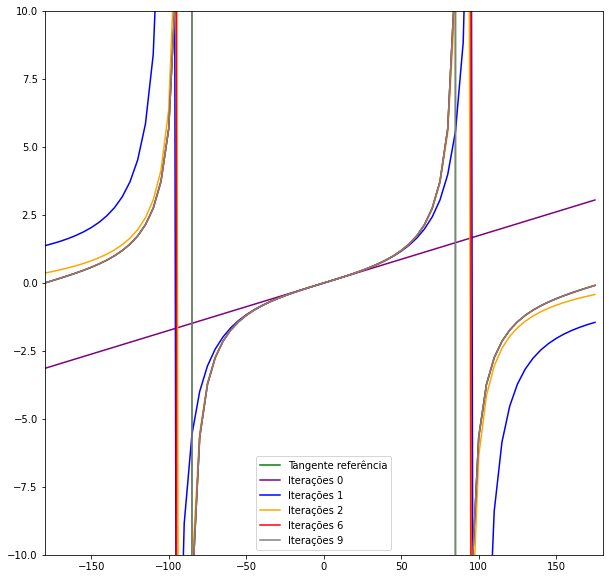

In [66]:
#Para entender de onde saiu a função tangente
# fica o vídeo do Mathologer https://www.youtube.com/watch?v=Lk_QF_hcM8A
#
# tan(x) =                   x
#          -----------------------------------------
#           1 - x^2
#              -------------------------------------
#               3 - x^2
#                  ---------------------------------
#                   5 - x^2
#                      -----------------------------
#                       7 - x^2
#                          -------------------------
#                           9 - x^2
#                              ---------------------
#                               11 - x^2
#                                   ----------------
#                                     13 - x^2
#                                         ----------
#                                           15 - x^2
#                                               ----
#                                                ...

PI = 3.14159265359

#Define função recursiva da tangente
def tan_recursion(den, level, maxLevel, radQuadrado):
    if level < maxLevel:
        valor_calculado = den - radQuadrado / tan_recursion(den+2,level+1,maxLevel,radQuadrado) # caso comum
    else:
        valor_calculado = den # condição de parada
    return valor_calculado


#Define função tangente
def tan(rad, maxLevel):
    radQuadrado = rad*rad #calcula o quadrado
    if rad == 0.0:
        return 0.0
    valor_calculado = rad / tan_recursion(1, 0, maxLevel,radQuadrado)
    return valor_calculado

#Define função que converte graus em radianos
def grau_para_rad(angulo):
    return angulo*PI/180


#Calcula dois exemplos de tangente recursivo com 100 iterações
print("Tangente de Pi/4 é %.2f" % tan(grau_para_rad(45),10))
print("Tangente de Pi/2 é %.2f" % tan(grau_para_rad(90),10))

#Cria lista com valores de -180 a 175, a cada 5 (-180,-175,-170,...)
intervalo_impressao = list(range(-180, 180, 5))

#Cria lista para guardar valores de tangente calculados
valores_tangente = []
valores_tangente_recursivo = [[],[],[],[],[]]

#Importa biblioteca matemática para calcular a tangente
import math

iteracoes = [0,1,2,6,9]
#Para cada um dos ângulos na lista intervalo_impressão
for angulo in intervalo_impressao:
    # Transformamos o ângulo em radianos
    rads = grau_para_rad(angulo)

    #Calculamos a tangente do ângulo com a biblioteca matemática
    valores_tangente.append(math.tan(rads))

    #Calculamos a tangente recursiva dos mesmos ângulos
    # com 0,1,2,6,9 chamadas recursivas e guardamos nas listas apropriadas
    for i in range(5):
        valores_tangente_recursivo[i].append(tan(rads, iteracoes[i]))

#Importamos a biblioteca gráfica
import matplotlib.pyplot as pyplot

fig, ax = pyplot.subplots(figsize=(10,10))
#Plotamos os valores calculados pela biblioteca matemática
ax.plot(intervalo_impressao, valores_tangente, 'green', label="Tangente referência")


cores = ["purple","blue","orange","red", "gray"]
#Plotamos os valores calculados pela função de tangente recursiva, cada uma com uma cor
for i in range(5):
    ax.plot(intervalo_impressao, valores_tangente_recursivo[i], cores[i], label=f"Iterações {iteracoes[i]}")

#Limitamos a área de plotagem de -Pi a Pi (eixo X), e -10 a 10 (eixo Y)
ax.axis([-180, 180, -10, 10])
ax.legend()

#Imprimimos os valores plotados em tela, abrindo a janela com os valores plotados
pyplot.show()

### Rota mais curta
Outro exemplo já mostrado na introdução foi a procura pela rota mais curta entre dois vértices de um grafo.

Criemos primeiro um grafo com rotas aéreas entre algumas cidades

In [67]:
class Vertice():
    def __init__(self, nome):
        self.nome = nome
        self.verticesConectados = []

    def adicionarVerticeConectado(self, novoVertice, distancia):
        self.verticesConectados.append((novoVertice, distancia))
        novoVertice.verticesConectados.append((self, distancia))

    def apagarConexao(self, vertice):
        for (verticeConectado, distancia) in self.verticesConectados:
            if verticeConectado == vertice:
                self.verticesConectados.remove((verticeConectado, distancia))
                verticeConectado.verticesConectados.remove((self, distancia))
                break

    def apagarConexoes(self):
        for (verticeConectado, distancia) in self.verticesConectados:
            for verticeTuple in verticeConectado.verticesConectados:
                if verticeTuple[0] == self:
                    verticeConectado.verticesConectados.remove(verticeTuple)
        del self

# Belém (Val-de-cans) e Brasília (Juscelino Kubitscheck)
bel = Vertice("BEL")
bsb = Vertice("BSB")
bel.adicionarVerticeConectado(bsb, 1600)

# Belo Horizonte (Confins)
cnf = Vertice("CNF")
bel.adicionarVerticeConectado(cnf, 2100)
bsb.adicionarVerticeConectado(cnf, 618)

# São Paulo (Guarulhos)
gru = Vertice("GRU")
bel.adicionarVerticeConectado(gru, 2472)
bsb.adicionarVerticeConectado(gru, 876)

# Rio de Janeiro (Galeão)
gig = Vertice("GIG")
gig.adicionarVerticeConectado(gru, 360)
gig.adicionarVerticeConectado(bsb, 936)
gig.adicionarVerticeConectado(cnf, 340)

Em seguida, montamos a estratégia recursiva para encontrar a menor rota

In [68]:
def buscaRotaMaisCurta (verticePartida, verticeDestino, distanciaVisitada=0, verticesVisitados=None):
    # Esta é uma função recursiva
    if verticesVisitados is None:
        verticesVisitados = [verticePartida]

    # A condição de parada é quando o vértice de destino já está na rota,
    # o que significa que chegamos ao destino usando a rota descrita pelos
    # vértices visitados
    if verticeDestino in verticesVisitados:
        return distanciaVisitada, verticesVisitados

    distanciaRotaMaisCurta = 99999999999999 # distância absurda
    rotaMaisCurta = None

    # Para cada vértice conectado ao ponto de partida, explore os vértices conectados
    for (verticeEscala, distancia) in verticePartida.verticesConectados:
        # Não faça duas escalas numa mesma cidade
        if verticeEscala in verticesVisitados:
            continue
        # Busca a menor rota entre o vértice de escala e o destino
        distanciaNovaRota, NovaRota = buscaRotaMaisCurta(verticeEscala,
                                                         verticeDestino,
                                                         distanciaVisitada+distancia,
                                                         [*verticesVisitados, verticeEscala])
        # Pegue sempre a rota mais curta
        if distanciaNovaRota < distanciaRotaMaisCurta:
            distanciaRotaMaisCurta = distanciaNovaRota
            rotaMaisCurta = NovaRota

    # Retorne as rotas parciais mais curtas
    return distanciaRotaMaisCurta, rotaMaisCurta

distancia, rota = buscaRotaMaisCurta(bel, gru)
print("Rota mais curta entre Belém e Guarulhos:%d km passando por %s" % (distancia, list(map(lambda x: x.nome, rota))))

Rota mais curta entre Belém e Guarulhos:2472 km passando por ['BEL', 'GRU']


Agora removamos a conexão direta entre Guarulhos e Belém e procuremos a rota alternativa mais curta

In [69]:
gru.apagarConexao(bel)
distancia, rota = buscaRotaMaisCurta(bel, gru)
print("Rota mais curta entre Belém e Guarulhos:%d km passando por %s" % (distancia, list(map(lambda x: x.nome, rota))))

Rota mais curta entre Belém e Guarulhos:2476 km passando por ['BEL', 'BSB', 'GRU']


Agora removamos a conexão direta entre Brasília e Belém e procuremos a rota alternativa mais curta

In [70]:
bsb.apagarConexao(bel)
from pyinstrument import Profiler
p = Profiler(interval=0.00001)
p.start()
distancia, rota = buscaRotaMaisCurta(bel, gru)
p.stop()
print("Rota mais curta entre Belém e Guarulhos:%d km passando por %s" % (distancia, list(map(lambda x: x.nome, rota))))
print(p.output_text(color=True, show_all=True, timeline=True))

Rota mais curta entre Belém e Guarulhos:2800 km passando por ['BEL', 'CNF', 'GIG', 'GRU']

  _     ._   __/__   _ _  _  _ _/_   Recorded: 18:23:22  Samples:  120
 /_//_/// /_\ / //_// / //_'/ //     Duration: 0.003     CPU time: 0.004
/   _/                      v4.3.0

Program: /usr/local/lib/python3.10/dist-packages/ipykernel_launcher.py -f /home/gabriel/.local/share/jupyter/runtime/kernel-52e1595c-cc7e-44ce-95b2-61140f46f792.json

0.003 run_ast_nodes  IPython/core/interactiveshell.py:3265
|- 0.000 __get__  traitlets/traitlets.py:675
|- 0.000 getattr  <built-in>:0
|- 0.000 helper  contextlib.py:279
|  `- 0.000 __init__  contextlib.py:102
|- 0.000 __enter__  contextlib.py:130
|  `- 0.000 [self]  
|- 0.000 __call__  codeop.py:117
|  `- 0.000 compile  <built-in>:0
|- 0.000 __exit__  contextlib.py:139
|  `- 0.000 [self]  
|- 0.001 run_code  IPython/core/interactiveshell.py:3416
|  |- 0.000 __call__  IPython/core/hooks.py:103
|  |- 0.000 [self]  
|  `- 0.001 <module>  ../../../tmp/ipykern

Agora removamos a conexão direta entre Confins e Belém (removendo todos as rotas possíveis)

In [71]:
cnf.apagarConexao(bel)
distancia, rota = buscaRotaMaisCurta(bel, gru)
print("Rota mais curta entre Belém e Guarulhos:%d km passando por %s" % (distancia, rota))

Rota mais curta entre Belém e Guarulhos:99999999999999 km passando por None


Como a rota inexiste (None), a distância máxima da rota é o valor de distância máxima utilizada para comparação no algoritmo.

### Remontar grafo de requisitos

Outro caso de uso típico é remontar um grafo de requisitos/dependências.

Um grafo de requisitos representa a relação de dependência entre diversos componentes.

Isto significa que um componente requer que uma série de outros componentes estejam disponíveis antes de este componente ser compilado, montado, etc.

Este tipo de grafo é utilizado tanto para o desenvolvimento de software, quanto para a instalação de pacotes (Debian/Ubuntu usam Apt, Archlinux usa Pacman, Windows pode usar Apt(com Cygwin)/Pacman(com msys2)/Scoop, Mac OS pode usar Homebrew/MacPorts/Fink, distribuições de bibliotecas multiplataforma Vcpkg/Spack/etc).

Um exemplo do pacote Python3 para Ubuntu:

![](05_recursao/python3.png)

Repare que o pacote depende de uma série de outros pacotes. Podemos olhar um deles.

![](05_recursao/libpython3.png)

Vamos agora implementar este grafo para um conjunto de bibliotecas do simulador de redes ns-3,
e descobrir, usando recursão, a ordem de construção destas bibliotecas.

In [72]:
modulos_ns3 = {
    # Módulo      : lista de dependencias
    "applications":["internet","stats"],
    "flow-monitor":["internet","stats"],
    "lte":["fd-net-device","core","network","spectrum","stats","buildings","virtual-net-device","point-to-point","applications","internet","csma","config-store","oran"],
    "netanim":["internet","mobility","wimax","wifi","csma","lte","uan","energy","lr-wpan","wave","point-to-point-layout"],
    "internet":["network","core","bridge","traffic-control"],
    "network":["core","stats"],
    "core":[],
    "stats":["core"],
    "bridge":["network"],
    "traffic-control":["network","core"],
    "fd-net-device":["network"],
    "spectrum":["propagation","antenna"],
    "propagation":["network","mobility"],
    "mobility":["network"],
    "antenna":["core"],
    "buildings":["mobility","propagation"],
    "virtual-net-device":["network"],
    "point-to-point":["network"],
    "csma":["network"],
    "config-store":["core","network"],
    "oran":["core","network","internet"],
    "wimax":["network","internet","propagation","mobility"],
    "wifi":["network","propagation","energy","spectrum","antenna","mobility"],
    "energy":["network"],
    "uan":["network","mobility","energy"],
    "lr-wpan":["network","core","mobility","spectrum","propagation"],
    "wave":["core","propagation","wifi","internet"],
    "point-to-point-layout":["internet","point-to-point","mobility"],
}

Neste caso, temos vértices direcionados, já que a dependência é unidirecional.

In [73]:
MAPA_NOME_VERTICE_PARA_INSTANCIA = {}

class VerticeDirecionado:
    # Cria vértice
    def __init__(self, nome, dependencias):
        self.nome = nome
        self.dependentes = {}
        self.dependencias = {}
        # Se forem passadas dependencias, as utiliza
        if dependencias:
            self.adicionar_dependencias(dependencias)

    def adicionar_dependencias(self, dependencias):
        global MAPA_NOME_VERTICE_PARA_INSTANCIA
        # Para cada dependência
        for dependencia in dependencias:
            # Se não existir no mapa, cria um vértice sem dependências (serão resolvidas posteriormente)
            if dependencia not in MAPA_NOME_VERTICE_PARA_INSTANCIA:
                MAPA_NOME_VERTICE_PARA_INSTANCIA[dependencia] = VerticeDirecionado(dependencia, [])
            # Adicionar o módulo atual a lista de dependencias de cada módulo dependido
            MAPA_NOME_VERTICE_PARA_INSTANCIA[dependencia].dependentes.update({self.nome: self})
            self.dependencias[dependencia] = MAPA_NOME_VERTICE_PARA_INSTANCIA[dependencia]

    def __str__(self):
        return f"Módulo '{self.nome}' é dependência dos módulos: {', '.join(self.dependentes.keys())}"

for (modulo, dependencias) in modulos_ns3.items():
    if modulo not in MAPA_NOME_VERTICE_PARA_INSTANCIA:
        MAPA_NOME_VERTICE_PARA_INSTANCIA[modulo] = VerticeDirecionado(modulo, dependencias)
    else:
        MAPA_NOME_VERTICE_PARA_INSTANCIA[modulo].adicionar_dependencias(dependencias)

print(MAPA_NOME_VERTICE_PARA_INSTANCIA["antenna"])
print(MAPA_NOME_VERTICE_PARA_INSTANCIA["core"])

Módulo 'antenna' é dependência dos módulos: spectrum, wifi
Módulo 'core' é dependência dos módulos: lte, internet, network, stats, traffic-control, antenna, config-store, oran, lr-wpan, wave


Agora como podemos determinar a ordem de construção destes módulos?

Primeiro temos que decidir o que pode ser construído. Para isto, façamos o seguinte

In [74]:
def modulos_podem_ser_construidos(lista_modulos_pendentes, lista_modulos_montados):
    modulos = []
    for modulo_pendente in lista_modulos_pendentes:
        # Só podemos montar este módulo pendente se todas as suas
        # dependências já estiverem na lista de módulos montados
        pode_ser_construido = True
        for dependencia in MAPA_NOME_VERTICE_PARA_INSTANCIA[modulo_pendente].dependencias:
            # Checa se a dependência foi montada
            if dependencia not in lista_modulos_montados:
                pode_ser_construido = False
                break

        # Se o módulo atual não pode ser construído, o pulamos
        if not pode_ser_construido:
            continue
        modulos.append(modulo_pendente)
    return modulos

print(modulos_podem_ser_construidos(["core","antenna", "stats","network", "internet"],[]))
print(modulos_podem_ser_construidos(["antenna", "stats","network", "internet"],["core"]))
print(modulos_podem_ser_construidos(["antenna", "network", "internet"],["core", "stats"]))

['core']
['antenna', 'stats']
['antenna', 'network']


Como temos como determinar o que pode ser construído, podemos ordenar a montagem dos componentes.

In [75]:
def ordem_montagem_recursiva(lista_modulos_pendentes, lista_modulos_montados, numero_etapas = 0, etapas={}):
    # Se todos os módulos já tiverem sido construídos, não temos mais o que fazer
    if len(lista_modulos_pendentes) == 0:
        return etapas

    if numero_etapas not in etapas:
        etapas[numero_etapas] = []

    # Para cada etapa, nós construímos tudo que for possível concorrentemente
    for modulo in modulos_podem_ser_construidos(lista_modulos_pendentes, lista_modulos_montados):
        etapas[numero_etapas].append(modulo)
        lista_modulos_pendentes.remove(modulo)
        lista_modulos_montados.append(modulo)

    if len(lista_modulos_pendentes) == 0:
        return etapas

    return ordem_montagem_recursiva(lista_modulos_pendentes,
                                   lista_modulos_montados,
                                   numero_etapas+1,
                                   etapas)

etapas_montagem = ordem_montagem_recursiva(list(MAPA_NOME_VERTICE_PARA_INSTANCIA.keys()), [], 0)
print(f"A ordem de montagem com o menor número de etapas igual a {len(etapas_montagem)} é:")
for (key, value) in etapas_montagem.items():
    print(f"Etapa {key}: {value}")

A ordem de montagem com o menor número de etapas igual a 9 é:
Etapa 0: ['core']
Etapa 1: ['stats', 'antenna']
Etapa 2: ['network']
Etapa 3: ['fd-net-device', 'virtual-net-device', 'point-to-point', 'csma', 'config-store', 'mobility', 'energy', 'bridge', 'traffic-control']
Etapa 4: ['internet', 'uan', 'propagation']
Etapa 5: ['applications', 'flow-monitor', 'spectrum', 'buildings', 'oran', 'wimax', 'point-to-point-layout']
Etapa 6: ['lte', 'wifi', 'lr-wpan']
Etapa 7: ['wave']
Etapa 8: ['netanim']


Com esta ordem de montagem, podemos executar diferentes componentes em uma mesma etapa em paralelo, já que sabemos que estes são independentes entre si.

Também podemos fazer outra checagem importante recursivamente: listar todas as dependências de um componente, por exemplo, para determinar que pacotes devem ser instalados para satisfazer a aplicação que o usuário realmente quer instalar.

In [76]:
def lista_dependencias_recursivamente(componente):
    lista_completa_dependencias = set()
    for dependencia in MAPA_NOME_VERTICE_PARA_INSTANCIA[componente].dependencias:
        lista_completa_dependencias.add(dependencia)
        lista_completa_dependencias.update(lista_dependencias_recursivamente(dependencia))
    return list(lista_completa_dependencias)
print(f"Módulo wifi explicitamente requer os seguintes módulos: {list(sorted(MAPA_NOME_VERTICE_PARA_INSTANCIA['wifi'].dependencias.keys()))}")
print(f"Módulo wifi implicitamente requer os seguintes módulos: {list(sorted(lista_dependencias_recursivamente('wifi')))}")

Módulo wifi explicitamente requer os seguintes módulos: ['antenna', 'energy', 'mobility', 'network', 'propagation', 'spectrum']
Módulo wifi implicitamente requer os seguintes módulos: ['antenna', 'core', 'energy', 'mobility', 'network', 'propagation', 'spectrum', 'stats']


Como visto, o módulo wifi explicitamente depende dos módulos `antenna`, `energy`, `mobility`, `network`, `propagation` e `spectrum`, porém também dependende de `core` e `stats` indiretamente.

O gerenciador de pacotes Spack, voltado para aplicações de supercomputadores (HPC), é capaz de mostrar via linha de comando a árvore de dependências entre os pacotes.

![](./05_recursao/spack.png)